In [65]:
import pandas as pd
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Uniform Section

In [112]:
#data
T0hip = 20
T0 = [T0hip+273] #K
Tamb =293
#physical properties:
esp_weight = 7.850 # kg/m³ 
K = 43 #W/m·K
#50
h = 9.30 #W/m².K
cp = 486 #J/kg·K
alfa = K/(esp_weight*cp)
#geometric properties:
L = 0.2 #m
w = 0.04 #m
thick = 0.00477 #m
P = 2*(w+thick)
At = w*thick
#time properties:
time = 30 #min

#iteration
it_time = 301 #time 
it_space = 201 #space

l_vector = np.linspace(0,L,it_space)
t_vector = np.linspace(0,time,it_time)
dx = L/(it_space-1)

#t = 0, T = 20°C p/ 0<=x<=l
initial_condition = np.concatenate([T0,293*np.ones(it_space-1)])


In [113]:

def result(h,P,Tamb,At,esp_weight,cp,alfa):
    #Temperature = initial_condition
    #d2T_dx2 = np.zeros(len(Temperature))
    
    
    def dT2dx2(Temperature,dx):
     #Temperature vector minus 2 elements = eq1 vector
        d2T_dx2 = (Temperature[2:] + Temperature[:-2] - 2*Temperature[1:-1])/(dx**2)
        return d2T_dx2

    def dTdt(Temperature,t_vector):
        #print(',',Temperature[0])
        ##Temperature[0] = (0.0114*t_vector - 0.6881*t_vector + 13.365*t_vector + 40)+273.
        Temperature[0] = (-0.0008*(t_vector)**4 + 0.0569*(t_vector)**3 - 1.4061*(t_vector)**2 + 15.884*(t_vector) + 26.874)+273.
        #Temperature[0]= (-77.66121068*np.exp(-0.20280913*t_vector)+104.89299483)+273
        #Temperature[0] = (23.38720381 * np.log(t_vector + 1) + 32.35616938)+273

        dT_dt = np.zeros(len(Temperature))
        dT_dt[1:-1] = (-h*P*(Temperature[1:-1]-Tamb))/(At*esp_weight*cp) + alfa*(dT2dx2(Temperature,dx))
       
        dT_dt[-1] = dT_dt[-2]
        
        
        
        return (dT_dt)
    
    solution = odeint(dTdt,initial_condition, t_vector)
  
    
    return solution

In [114]:
function = result(h,P,Tamb,At,esp_weight,cp,alfa)

In [115]:
function

array([[293.        , 293.        , 293.        , ..., 293.        ,
        293.        , 293.        ],
       [299.874     , 301.2651975 , 301.0843054 , ..., 293.00033718,
        293.00033441, 293.00033441],
       [299.874     , 302.81554341, 302.63850289, ..., 293.03562195,
        293.03554286, 293.03554286],
       ...,
       [299.874     , 398.36176624, 397.30443511, ..., 319.16311622,
        319.16026477, 319.16026477],
       [299.874     , 398.25604298, 397.20028624, ..., 319.15784927,
        319.15500056, 319.15500056],
       [299.874     , 398.13858125, 397.08452746, ..., 319.15011932,
        319.14727366, 319.14727366]])

In [116]:
lista = np.arange(0,31,1)

In [117]:
Temp_0 = (-0.0008*(lista)**4 + 0.0569*(lista)**3 - 1.4061*(lista)**2 + 15.884*(lista) + 26.874)
Temp_5 = function[:,50]-273.
Temp_10  = function[:,100]-273.
Temp_15  = function[:,150]-273.
Temp_20  = function[:,200]-273.

In [118]:
db = pd.read_excel('exp1.xlsx')

In [119]:
timeexp = np.array(db['Tempo (min)'])
tempexp0 = np.array(db['0 - Temperatura (°C)'])
tempexp5 = np.array(db['5 - Temperatura (°C)'])
tempexp10 = np.array(db['10 - Temperatura (°C)'])
tempexp15 = np.array(db['15 - Temperatura (°C)'])
tempexp20 = np.array(db['20 - Temperatura (°C)'])

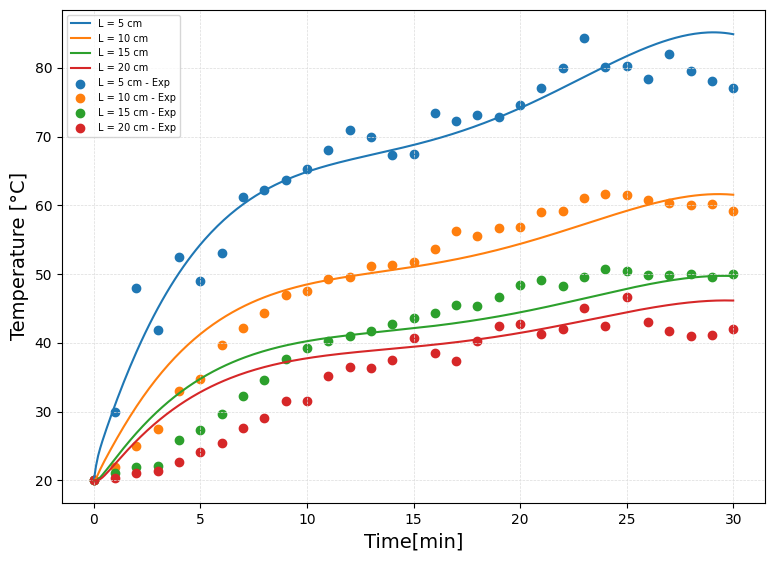

In [121]:
fig,ax = plt.subplots()
fig.set_size_inches(8., 6., forward=True)
fig.tight_layout(rect=[0.03, 0.03, 1., 0.95])
#plt.plot (lista, Temp_0, label='L = 0 cm')
plt.plot (t_vector, Temp_5, label='L = 5 cm')
plt.plot (t_vector, Temp_10 , label='L = 10 cm')
plt.plot (t_vector, Temp_15 , label='L = 15 cm')
plt.plot (t_vector, Temp_20 , label='L = 20 cm')
#plt.scatter(timeexp,tempexp0, label='L = 0 cm - Exp')
plt.scatter(timeexp,tempexp5, label='L = 5 cm - Exp')
plt.scatter(timeexp,tempexp10, label='L = 10 cm - Exp')
plt.scatter(timeexp,tempexp15, label='L = 15 cm - Exp')
plt.scatter(timeexp,tempexp20, label='L = 20 cm - Exp')
plt.xlabel('Time[min]', fontsize = 14)
plt.ylabel(u'Temperature [°C]', fontsize = 14)
plt.grid(color='gainsboro', linestyle='--', linewidth=0.5)
plt.legend(fontsize = 7)
#ax.set_xlim(0,tempo)
#ax.set_ylim(0,1.1*Ca0)